<a href="https://colab.research.google.com/github/nowoclock/PM_data/blob/main/PM_OutlierData_1220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 예시 데이터

In [ ]:
import pandas as pd
import numpy as np

# 랜덤 시드 고정
# 랜덤 시드 : 난수(랜덤 수)생성기에서 경우의 고정시킬 때 사용
np.random.seed(0)

num_samples = 1000


data = {
    "수입": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "지출": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 100

# 수입 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "수입"] = (
    df["수입"].mean() + 5 * df["수입"].std()
)
# 지출 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "지출"] = (
    df["지출"].mean() + 5 * df["지출"].std()
)

# 이상치 (Outlier Data)

In [ ]:
df.head()

,수입,지출
0,5764.052346,2277.981340
1,4400.157208,2446.236944
2,4978.737984,1788.842588
3,6240.893199,2052.357015
4,5867.557990,2114.026663


## 이상치 확인

### (1) 사분위수 (quartiles)

In [ ]:
column = '수입'
# 하위 25% (Q1 : 1사분면)
Q1 = df[column].quantile(0.25)
# 하위 75% (Q: 3사분면)
Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

# 하한 계산
lower_bound = Q1 - 1.5 * IQR
# 상한 계산
upper_bound = Q3 + 1.5 * IQR

# 하한과 상한의 역할 : 조건식에서 비교값
# 조건식(condition) = 비교열, 비교연산자, 비교 값
print(df[column].median())
print(lower_bound)
print(upper_bound)

# 조건식
# 하한 보다 작은 값 탐색
lower_condition = df[column] < lower_bound
# 상한 보다 큰 값 탐색
upper_condition = df[column] > upper_bound

# 이상치 확인 : 하한보다 작거나 | 상한보다 큰 것
outliers = df[lower_condition | upper_condition]
outliers

4051.760169283014
997.309470498351
7252.939470868489


,수입,지출
24,8892.378521,2856.152611
28,8892.378521,2558.652658
30,8892.378521,1623.147767
34,8892.378521,2376.995733
38,8892.378521,2201.312766
...,...,...
935,8892.378521,2653.591923
944,8892.378521,2020.541113
946,8892.378521,2005.092759
952,8892.378521,910.534240


## 시각화 이상치 확인

In [ ]:
!pip install matplotlib

### (2) 상자그림 (Box Plot)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


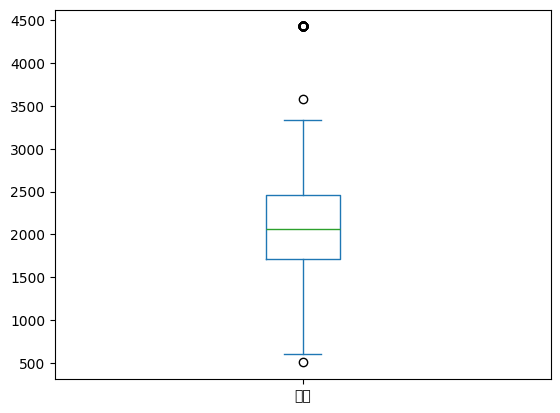

In [ ]:
df['지출'].plot(kind='box')

### (3) 산점도 (Scatter Plot)

<Axes: xlabel='수입', ylabel='지출'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from c

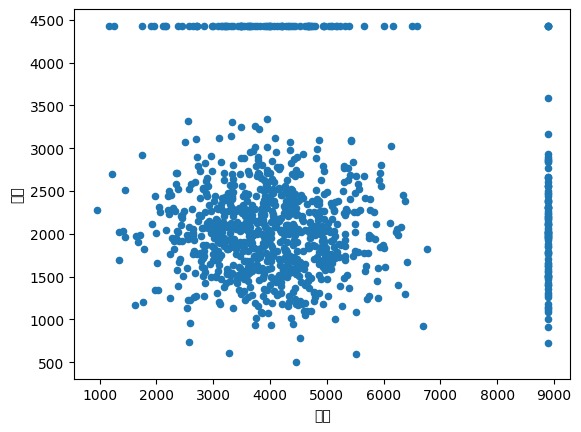

In [ ]:
# 수입와 지출 간의 산점도
df.plot.scatter(x="수입", y="지출")

# [실습]
2. `학점` 의 상자그림을 출력한다.
3. `학점` 의 사분위수를 활용한 이상치를 탐색하고 출력한다.
4. `학점` 의 이상치를 평균값으로 수정하고, 상자그림을 출력한다.
5. `학점`이 4.5 보다 크거나 1.0 보다 작은 데이터를 출력한다.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(0)

# 총 데이터 수
num_students = 10000

df = pd.DataFrame(
    {
        "나이": np.random.randint(20, 30, size=num_students),
        "학년": np.random.randint(1, 5, size=num_students),
        "학점": np.round(np.random.uniform(0, 5.0, size=num_students), 2),
    }
)

# 이상치 추가 수
num_outliers = 500

# 학점 열에 이상치 추가
outlier_indices_gpa = np.random.choice(df.index, num_outliers, replace=False)

df.loc[outlier_indices_gpa, "학점"] = np.round(
    np.random.uniform(0.0, 10.0, size=num_outliers), 2
)

In [ ]:
column = '학점'
# 하위 25% (Q1 : 1사분면)
Q1 = df[column].quantile(0.25)
# 하위 75% (Q: 3사분면)
Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

# 하한 계산
lower_bound = Q1 - 1.5 * IQR
# 상한 계산
upper_bound = Q3 + 1.5 * IQR

# 하한과 상한의 역할 : 조건식에서 비교값
# 조건식(condition) = 비교열, 비교연산자, 비교 값
print(df[column].median())
print(lower_bound)
print(upper_bound)

# 조건식
# 하한 보다 작은 값 탐색
lower_condition = df[column] < lower_bound
# 상한 보다 큰 값 탐색
upper_condition = df[column] > upper_bound

# 이상치 확인 : 하한보다 작거나 | 상한보다 큰 것
df[lower_condition | upper_condition] = df[column].mean()

2.54
-2.5549999999999997
7.645


<ipython-input-18-1f7acc1154e0>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6050699999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[lower_condition | upper_condition] = df[column].mean()
<ipython-input-18-1f7acc1154e0>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6050699999999996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[lower_condition | upper_condition] = df[column].mean()


In [ ]:
condition1 = df['학점'] > 4.5
condition2 = df['학점'] < 1.0

df[condition1 | condition2]
# 이상치 처리를 했지만 더 높고 더 낮은 값이 있어 이상치가 남아있다.

,나이,학년,학점
2,23.0,2.0,6.37
4,27.0,2.0,0.75
7,25.0,2.0,0.05
9,24.0,4.0,0.49
17,27.0,3.0,0.80
...,...,...,...
9985,21.0,1.0,4.85
9987,26.0,2.0,4.90
9993,24.0,3.0,0.29
9995,22.0,4.0,4.56
